<a href="https://colab.research.google.com/github/Orkthi/m-todos-numericos-para-equa-es-diferenciais/blob/main/M%C3%A9todo_de_Runge_Kutta_cl%C3%A1ssico_de_4a_ordem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

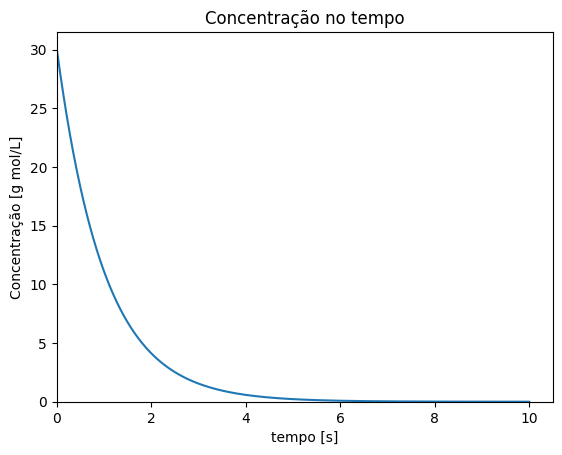

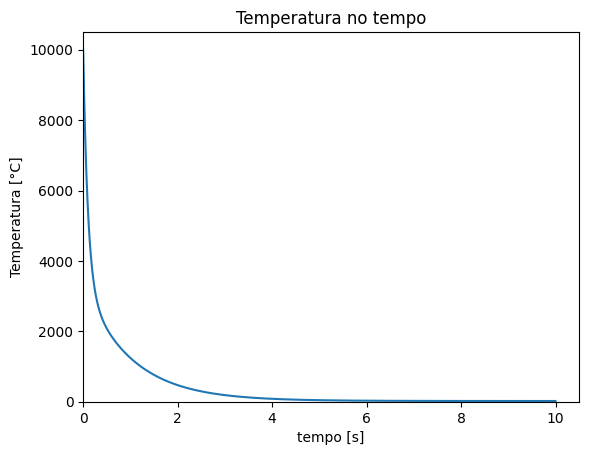

In [ ]:
# Importando bibliotecas
import matplotlib.pyplot as plt
import numpy as np

# Constantes
e = np.exp(1)

# Condições iniciais
C0 = 30
T0 = 10000

# Definições do tempo
h = 0.000001
t0 = 0
tf = 10

# Define a EDO da concentração
def dC(t, C, T):
    return -C*e**(-(10)/(T + 273))

# Define a EDO da temperatura
def dT(t, C, T):
    return ( 1000*C*e**(-(10)/(T + 273)) - 10*(T-20) )

# Define o Runge Kutta para ambas as funções.
def RK4(t, C, T):
    # Calculando os K's de ambas as funções
    k1_c = dC(t, C, T)
    k1_t = dT(t, C, T)

    k2_c = dC(t+h/2, C + h/2*k1_c, T+h/2*k1_t)
    k2_t = dT(t+h/2, C + h/2*k1_c, T+h/2*k1_t)

    k3_c = dC(t+h/2, C + h/2*k2_c, T+h/2*k2_t)
    k3_t = dT(t+h/2, C + h/2*k2_c, T+h/2*k2_t)

    k4_c = dC(t + h, C + k3_c*h, T + k3_t*h)
    k4_t = dT(t + h, C + k3_c*h, T + k3_t*h)

    # Calcula o novo valor das variáveis dependentes
    C_new = C + h/6*(k1_c + 2*k2_c + 2*k3_c + k4_c)
    T_new = T + h/6*(k1_t + 2*k2_t + 2*k3_t + k4_t)

    # Retorna os valores
    return [C_new, T_new]


# Número de pontos na simulação
N = int((tf - t0)/h)
   # Cria um array para guardar os valores (arrays são mais rápidos que listas)
t_ar = np.zeros(N )
C_ar = np.zeros(N )
T_ar = np.zeros(N )
 # Insere as condições iniciais no Array
t_ar[0] = t0
C_ar[0] = C0
T_ar[0] = T0

    # Inicia o laço com o RK4
i = 1

while i < N:
       # Calcula o tempo por meio do índice
  t = i * h

        # Guarda os novos valores nos arrays
  C_ar[i], T_ar[i] = RK4(t, C_ar[i - 1], T_ar[i - 1])
  t_ar[i] = t

        # Incrementa o índice
  i +=1

    # Plotando e deixando o gráfico bonitinho :)
    # Concentração
plt.title("Concentração no tempo")
plt.xlabel("tempo [s]")
plt.ylabel("Concentração [g mol/L]")
plt.plot(t_ar, C_ar)
plt.xlim(t0, None)
plt.ylim(0, None)
plt.show()

    # Temperatura
plt.title("Temperatura no tempo")
plt.xlabel("tempo [s]")
plt.ylabel("Temperatura [°C]")
plt.plot(t_ar, T_ar)
plt.xlim(t0, None)
plt.ylim(0, None)
plt.show()
/